****

# <center> <b> <span style="color:orange;"> African Institute for Mathematical Sciences RWANDA  </span> </b></center>

### <center> <b> <span style="color:green;">Assignment 1 : Numerical Linear Algebra (NLA) </span> </b></center>

### <left> <b> <span style="color:blue;">Presented by : </span> </b></left>  Manuella Kristeva NAKAM YOPDUP

## Question 5:
<b> Write a Julia program that performs matrix-vector multiplication two different ways: </b> 

<b> 1. using the built-in Julia command to find b = A . x </b>

In [1]:
import Pkg
Pkg.add("Plots")

Using Plots

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed Bzip2_jll ─ v1.0.8+2
  No Changes to `~/.julia/environments/v1.8/Project.toml`
    Updating `~/.julia/environments/v1.8/Manifest.toml`
  [6e34b625] ↑ Bzip2_jll v1.0.8+1 ⇒ v1.0.8+2
Precompiling project...
  ✓ Bzip2_jll
  ✓ FreeType2_jll
  ✓ Fontconfig_jll
  ✓ Cairo_jll
  ✓ Qt6Base_jll
  ✓ HarfBuzz_jll
  ✓ Qt6ShaderTools_jll
  ✓ libass_jll
  ✓ Pango_jll
  ✓ Qt6Declarative_jll
  ✓ FFMPEG_jll
  ✓ libdecor_jll
  ✓ Qt6Wayland_jll
  ✓ FFMPEG
  ✓ GLFW_jll
  ✓ GR_jll
  ✓ GR
  ✓ Plots
  18 dependencies successfully precompiled in 60 seconds. 144 already precompiled.


LoadError: syntax: extra token "Plots" after end of expression

In [2]:
function matvec_julia(A, x)
    return A * x
end

matvec_julia (generic function with 1 method)

In [3]:
##### Test function matvec_julia

# prompt to input 
print("Enter the size n of the matrix-vector :  \n\n") 

# Calling readline() function 
n = readline()
n = parse(Int64, n)  

A = rand(n, n)
x = rand(n)

matvec_julia(A, x)


Enter the size n of the matrix-vector :  



stdin>  5


5-element Vector{Float64}:
 1.2156457924841757
 0.56236945555225
 0.7516324881202737
 0.7794221654293688
 1.4857090635443386

<b> 2. Using loops to find b = A . x : </b>
   

In [4]:
function matvec_loops(A, x)
    n = size(A, 1)
    b = zeros(n)  # Create a vector of zeros with length n
    for j in 1:n
        for i in 1:n
            b[i] += A[i, j] * x[j]  # Update b[i] by adding A[i, j] * x[j]
        end
    end
    return b
end

matvec_loops (generic function with 1 method)

In [5]:
# Julia program to take input from user 

# prompt to input 
print("Enter the size n of the matrix-vector :  \n\n") 

# Calling readline() function 
n = readline()
n = parse(Int64, n)  

A = rand(n, n)
x = rand(n)

matvec_loops(A, x)

Enter the size n of the matrix-vector :  



stdin>  5


5-element Vector{Float64}:
 1.04422321652313
 0.8510144553397969
 0.44460185651961676
 1.5253701177214791
 1.532995768124133

<b> 3. Perform three experiments using different vector and matrix sizes (3x3), (10x10), and (100x100). Time (by using the Julia @time function) the two different methods on matrices of various sizes. Which method is faster? </b>

In [11]:
using Plots

# Function to run experiments and store execution times
function compare_times(sizes)
    built_in_times = Float64[]
    loop_times = Float64[]

    for size in sizes
        # Generate a random matrix and vector
        A = rand(size, size)
        x = rand(size)

        # Measure time for Julia method
        t_builtin = @elapsed matvec_julia(A, x)
        push!(built_in_times, t_builtin)
        
        # Measure time for loop method
        t_loops = @elapsed matvec_loops(A, x)
        push!(loop_times, t_loops)

        
    end

    return built_in_times, loop_times
end


compare_times (generic function with 1 method)

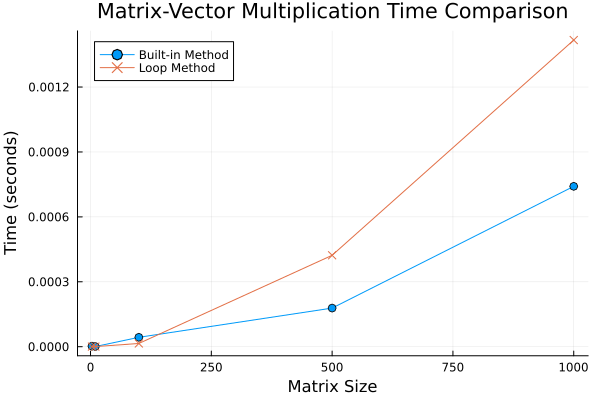

In [15]:
# Define sizes for the experiments
sizes = [3, 10, 100, 500, 1000]

# Run experiments and get execution times
builtin_times, loop_times = compare_times(sizes)

# Plotting the results
plot(sizes, builtin_times, label="Built-in Method", marker=:o, xlabel="Matrix Size", ylabel="Time (seconds)", title="Matrix-Vector Multiplication Time Comparison")
plot!(sizes, loop_times, label="Loop Method", marker=:x)

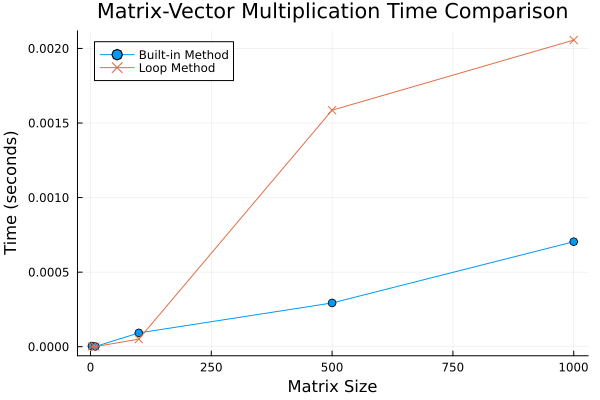

In [13]:
# Define sizes for the experiments
sizes = [3, 10, 100, 500, 1000]

# Run experiments and get execution times
builtin_times, loop_times = compare_times(sizes)

# Plotting the results
plot(sizes, builtin_times, label="Built-in Method", marker=:o, xlabel="Matrix Size", ylabel="Time (seconds)", title="Matrix-Vector Multiplication Time Comparison")
plot!(sizes, loop_times, label="Loop Method", marker=:x)

From both experiments, we notice that for matrices of size less than or equal to 100, the version with loop is faster than the built-in julia version and beyond 100, the built-in julia version is the fastest. Also we note that the evolution of the JUlia version during both experiments is identical while that with for loop varies a lot.